<a href="https://colab.research.google.com/github/harishmuh/Bellabeats_Capstone_Google_Data_Analytics/blob/main/Bellabeat_user_data_analysis_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

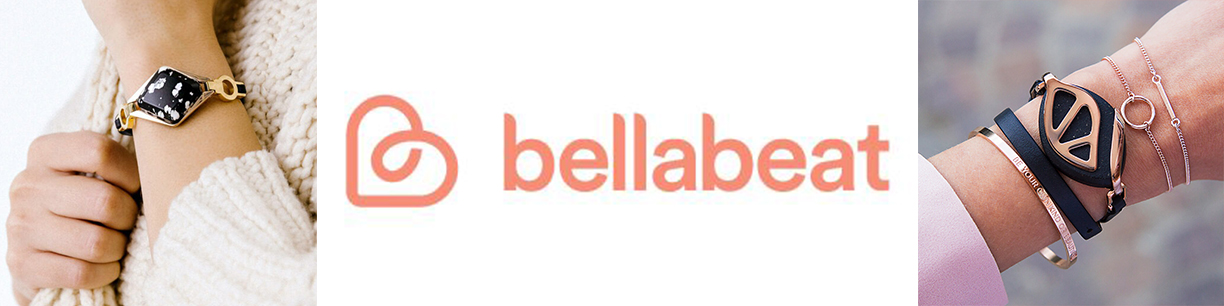

# Bellabeats data analysis project

## 1. Context
Bellabeat is a health and wellness technology company that focuses on women's health tracking. This company was founded in 2013 by Urška Sršen and Sando Mur. They offer different smart devices that collect data on activity, sleep, stress, and other health data to empower women with knowledge about their own health and habits.

## 2. Ask phase

### 2.1 Business task
* To identify customer trends of smart device usage.
* To apply smart device usage insights in improving bellabeat customer experience.

### 2.2 Key Stakeholders

* Urška Sršen: Bellabeat cofounder and Chief Creative Officer
* Sando Mur: Bellabeat cofounder and key member of Bellabeat executive team
* Bellabeat Marketing Analytics team
* Bellabeat Customers

## 3. Prepare Phase

### 3.1 Dataset source
The data is originated from [FitBit Fitness tracker dataset](https://www.kaggle.com/datasets/arashnic/fitbit) that have been made available through Mobius. It contains personal fitness tracker data from over thirty FitBit users who have given consent to use their data.

### 3.2 Accessibility and privacy of data
The available data for this project is open-source. We can copy, modify, distribute and perform the work without asking permission from the data owner.

### 3.3 Data organization and verification
There are 7 CSV files available below. All files represent different quantitative data produced by FitBit technology. You can see those files in table below.

#### Data organization and verification

| Table Name                        | Type                   | Description |
|------------------------------------|------------------------|-------------|
| dailyActivity_merged              | Microsoft Excel CSV    | Daily Activity over 31 days of 33 users. Tracking daily: Steps, Distance, Intensities, Calories |
| dailyCalories_merged              | Microsoft Excel CSV    | Daily Calories over 31 days of 33 users |
| dailySteps_merged                 | Microsoft Excel CSV    | Daily Steps over 31 days of 33 users |
| hourlyCalories_merged             | Microsoft Excel CSV    | Hourly Calories burned over 31 days of 33 users |
| hourlyIntensities_merged          | Microsoft Excel CSV    | Hourly total and average intensity over 31 days of 33 users |
| hourlySteps_merged                | Microsoft Excel CSV    | Hourly Steps over 31 days of 33 users |
| sleepDay_merged                   | Microsoft Excel CSV    | Daily sleep logs, tracked by: Total count of sleeps a day, Total minutes, Total Time in Bed |


### 3.4 Data Credibility

We have sample size greater than 30. This is relatively reliable enough for sample size according to this [reference](https://reviews.tn/wiki/why-is-30-a-good-sample-size/).

## 4. Process phase

### 4.1 Packages used
Opening packages for data cleaning and further data analysis

In [1]:
# Installing packages
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Library
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(readr)

### 4.2 Loading dataset
We only select users’ sleeping habits, their steps recorded, sleep activity, and calories for analysis.

In [3]:
# Loading dataset 'daily activity'
Activity_all <- read_csv("dailyActivity_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# Loading dataset 'daily step record'
steps_records <- read_csv("dailySteps_merged.csv")

Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
# Loading dataset 'daily sleep records'
sleep_records <- read_csv("sleepDay_merged.csv")

Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
# Loading dataset 'daily calories'
Calories_all <- read_csv("dailyCalories_merged.csv")

Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
# Loading dataset 'hourly steps'
hourlySteps <- read_csv("hourlySteps_merged.csv")

Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
# Loading dataset 'hourly intensities'
hourlyIntensities <- read_csv("hourlyIntensities_merged.csv")

Rows: 22099 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
# Loading dataset 'hourly calories'
hourlyCalories <- read_csv("hourlyCalories_merged.csv")

Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### 4.2 Preview dataset

In [36]:
# Preview for daily activity
glimpse(Activity_all)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [37]:
head(Activity_all)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [10]:
# Preview for step records
glimpse(steps_records)

Rows: 940
Columns: 3
$ Id          <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366…
$ ActivityDay <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/2016", "4/16/…
$ StepTotal   <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019, 15506, 1054…


In [11]:
head(steps_records)

Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


In [41]:
# Preview for calories record
glimpse(Calories_all)

Rows: 940
Columns: 3
$ Id          <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366…
$ ActivityDay <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/2016", "4/16/…
$ Calories    <dbl> 1985, 1797, 1776, 1745, 1863, 1728, 1921, 2035, 1786, 1775…


In [42]:
head(Calories_all)

Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


In [43]:
# Preview for hourlySteps
glimpse(hourlySteps)

Rows: 22,099
Columns: 4
$ Id          <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366…
$ ActivityDay <chr> "2016-04-12", "2016-04-12", "2016-04-12", "2016-04-12", "2…
$ times       <chr> NA, "01:00:00", "02:00:00", "03:00:00", "04:00:00", "05:00…
$ StepTotal   <dbl> 373, 160, 151, 0, 0, 0, 0, 0, 250, 1864, 676, 360, 253, 22…


In [44]:
head(hourlySteps)

Id,ActivityDay,times,StepTotal
<dbl>,<chr>,<chr>,<dbl>
1503960366,2016-04-12,NA,373
1503960366,2016-04-12,01:00:00,160
1503960366,2016-04-12,02:00:00,151
1503960366,2016-04-12,03:00:00,0
1503960366,2016-04-12,04:00:00,0
1503960366,2016-04-12,05:00:00,0


In [45]:
# Preview for hourlyIntensities
glimpse(hourlyIntensities)

Rows: 22,099
Columns: 5
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ ActivityDay      <chr> "2016-04-12", "2016-04-12", "2016-04-12", "2016-04-12…
$ times            <chr> NA, "01:00:00", "02:00:00", "03:00:00", "04:00:00", "…
$ TotalIntensity   <dbl> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…


In [46]:
head(hourlyIntensities)

Id,ActivityDay,times,TotalIntensity,AverageIntensity
<dbl>,<chr>,<chr>,<dbl>,<dbl>
1503960366,2016-04-12,NA,20,0.333333
1503960366,2016-04-12,01:00:00,8,0.133333
1503960366,2016-04-12,02:00:00,7,0.116667
1503960366,2016-04-12,03:00:00,0,0.000000
1503960366,2016-04-12,04:00:00,0,0.000000
1503960366,2016-04-12,05:00:00,0,0.000000


In [47]:
# Preview for hourlyCalories
glimpse(hourlyCalories)

Rows: 22,099
Columns: 4
$ Id          <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366…
$ ActivityDay <chr> "2016-04-12", "2016-04-12", "2016-04-12", "2016-04-12", "2…
$ times       <chr> NA, "01:00:00", "02:00:00", "03:00:00", "04:00:00", "05:00…
$ Calories    <dbl> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, 66, 1…


In [48]:
head(hourlyCalories)

Id,ActivityDay,times,Calories
<dbl>,<chr>,<chr>,<dbl>
1503960366,2016-04-12,NA,81
1503960366,2016-04-12,01:00:00,61
1503960366,2016-04-12,02:00:00,59
1503960366,2016-04-12,03:00:00,47
1503960366,2016-04-12,04:00:00,48
1503960366,2016-04-12,05:00:00,48


In [49]:
# Preview for sleep records
glimpse(sleep_records)

Rows: 410
Columns: 6
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ ActivityDay        <chr> "4/12/2016", "4/13/2016", "4/15/2016", "4/16/2016",…
$ times              <chr> "12:00:00", "12:00:00", "12:00:00", "12:00:00", "12…
$ TotalSleepRecords  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


In [50]:
head(sleep_records)

Id,ActivityDay,times,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,12:00:00,1,327,346
1503960366,4/13/2016,12:00:00,2,384,407
1503960366,4/15/2016,12:00:00,1,412,442
1503960366,4/16/2016,12:00:00,2,340,367
1503960366,4/17/2016,12:00:00,1,700,712
1503960366,4/19/2016,12:00:00,1,304,320


### 4.3 Data cleaning

In [12]:
# Checking duplicates
sum(duplicated(steps_records))

[1] 0

In [13]:
sum(duplicated(sleep_records))

[1] 3

In [14]:
sum(duplicated(Activity_all))

[1] 0

In [15]:
sum(duplicated(Calories_all))

[1] 0

In [16]:
sum(duplicated(hourlySteps))

[1] 0

In [17]:
sum(duplicated(hourlyIntensities))

[1] 0

In [18]:
sum(duplicated(hourlyCalories))

[1] 0

In [19]:
# Removing duplicates
sleep_records <- sleep_records %>%
  distinct() %>%
  drop_na()

In [51]:
# Sanity check
sum(duplicated(steps_records))

[1] 0

**Formatting and merging data**

In [20]:
# Formating
sleep_records <- sleep_records %>%
  separate(SleepDay, into=c("ActivityDay", "times"), sep=' ')

Warning message:
“Expected 2 pieces. Additional pieces discarded in 410 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [21]:
# Merging data
step_sleep_all <- merge(sleep_records, steps_records, by = c('ActivityDay','Id'), all=TRUE)
step_sleep_all$ActivityDay <- as.Date(step_sleep_all$ActivityDay, format="%m/%d/%Y")

step_calories <- merge(Calories_all, steps_records, by = c('ActivityDay','Id'), all=TRUE)

hourlyIntensities <- hourlyIntensities %>%
  rename(date_time = ActivityHour) %>%
  mutate(date_time = as.POSIXct(date_time,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone())) %>%
  separate(date_time, into=c("ActivityDay", "times"), sep=' ')

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 934 rows [1, 25, 49, 73,
97, 121, 145, 169, 193, 217, 241, 265, 289, 313, 337, 361, 385, 409, 433, 457,
...].”


In [22]:
hourlyCalories <- hourlyCalories %>%
  rename(date_time = ActivityHour) %>%
  mutate(date_time = as.POSIXct(date_time,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone())) %>%
  separate(date_time, into=c("ActivityDay", "times"), sep=' ')

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 934 rows [1, 25, 49, 73,
97, 121, 145, 169, 193, 217, 241, 265, 289, 313, 337, 361, 385, 409, 433, 457,
...].”


In [23]:
Calories_Intensities <- merge(hourlyIntensities,hourlyCalories, by = c('Id', 'times'), all= TRUE)

## 5. Data Analysis and Share Phase

* There are numerous null or zero values in the data set where sleep is documented. We want to find out if those users are not using any products even during the day, or they don’t have their sleep analyzed.



### 5.1 Device usage while sleeping

**Data visualization**

Device usage while sleeping

In [25]:
step_sleep_protect <- transform(step_sleep_all,
                      user = as.numeric(factor(Id)))

Warning message:
“Removed 530 rows containing missing values or values outside the scale range
(`geom_point()`).”


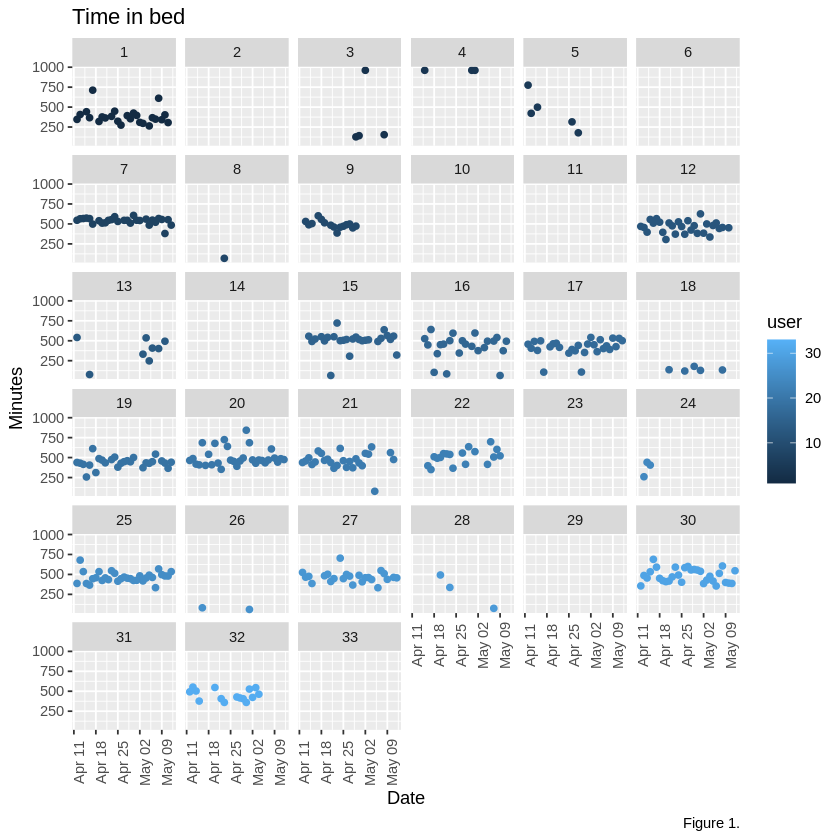

In [26]:
ggplot(step_sleep_protect) +
  geom_point(aes(x=ActivityDay, y=TotalTimeInBed, colour=user)) +
  facet_wrap(~user) +
  labs(x="Date", y="Minutes", title = "Time in bed", caption="Figure 1.")+
  theme(axis.text.x = element_text(angle = 90))

Let's see if those users are using devices during the day

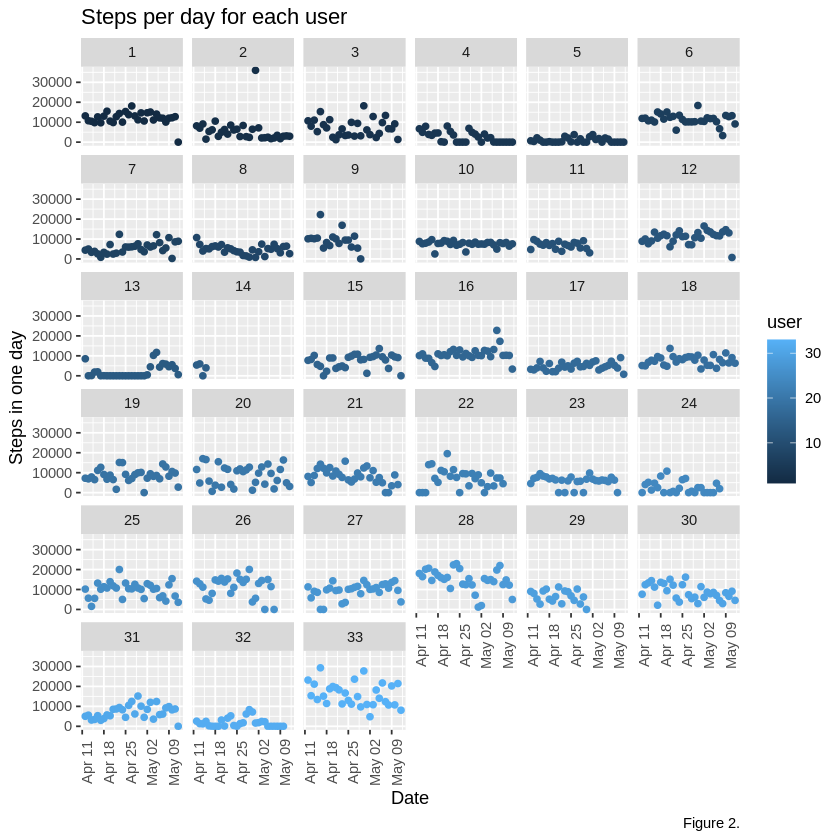

In [27]:
ggplot(step_sleep_protect) +
  geom_point(aes(x=ActivityDay, y=StepTotal, colour=user)) +
  facet_wrap(~user) +
  labs(x="Date", y="Steps in one day", title = "Steps per day for each user", caption="Figure 2.")+
  theme(axis.text.x = element_text(angle = 90))

Comparing both charts, one can see that there are several users that uses Bellabeat devices to track their daily steps but not when they go to bed.

**Sleeping habits**

From the data set “sleepDay_merged”, we can see two different columns titled “TotalMinutesAsleep” and “TotalTimeInBed”, which contains different values. I am curious how long until Bellabeat users actually fall asleep after they went to bed.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 530 rows containing non-finite outside the scale range
(`stat_smooth()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 530 rows containing non-finite outside the scale range
(`stat_smooth()`).”


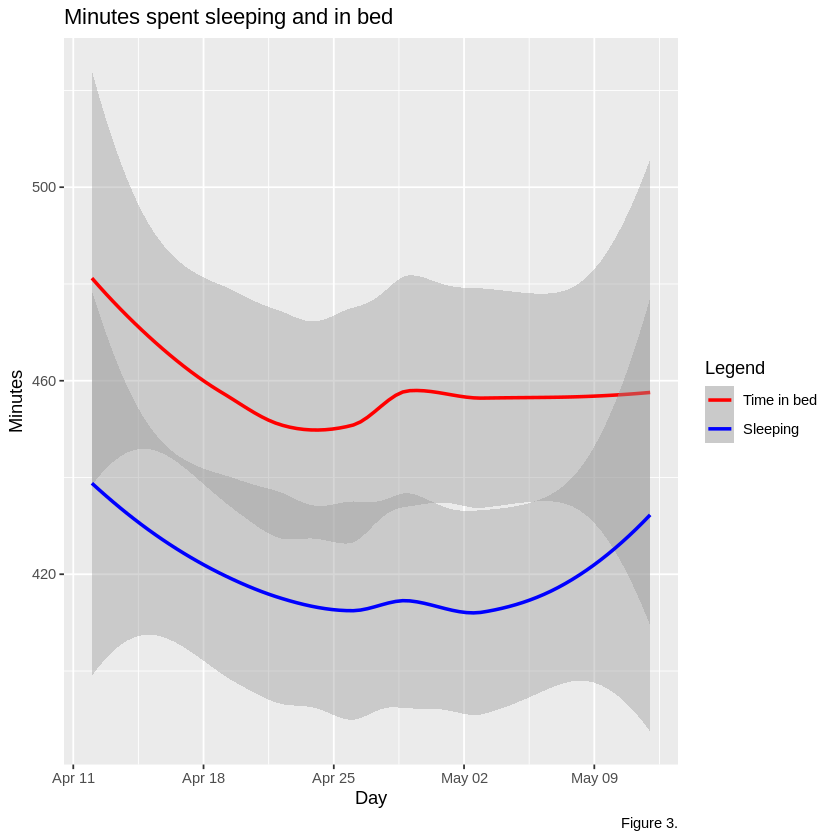

In [28]:
ggplot(step_sleep_protect)+
  geom_smooth(aes(x=ActivityDay, y=TotalTimeInBed, col = 'red'))+
  geom_smooth(aes(x=ActivityDay, y=TotalMinutesAsleep, col='blue'))+
  labs(x="Day", y="Minutes", title = "Minutes spent sleeping and in bed", caption="Figure 3.")+
  scale_color_identity( name = "Legend",
                        breaks = c ("red", "blue"),
                        labels = c("Time in bed", "Sleeping"),
                        guide = "legend")

Using visualization tools, it is shown that there is approximately a 20 minutes gap before users fall asleep everyday.

### 5.2 Analysing user steps data

Average step per day of 33 users

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


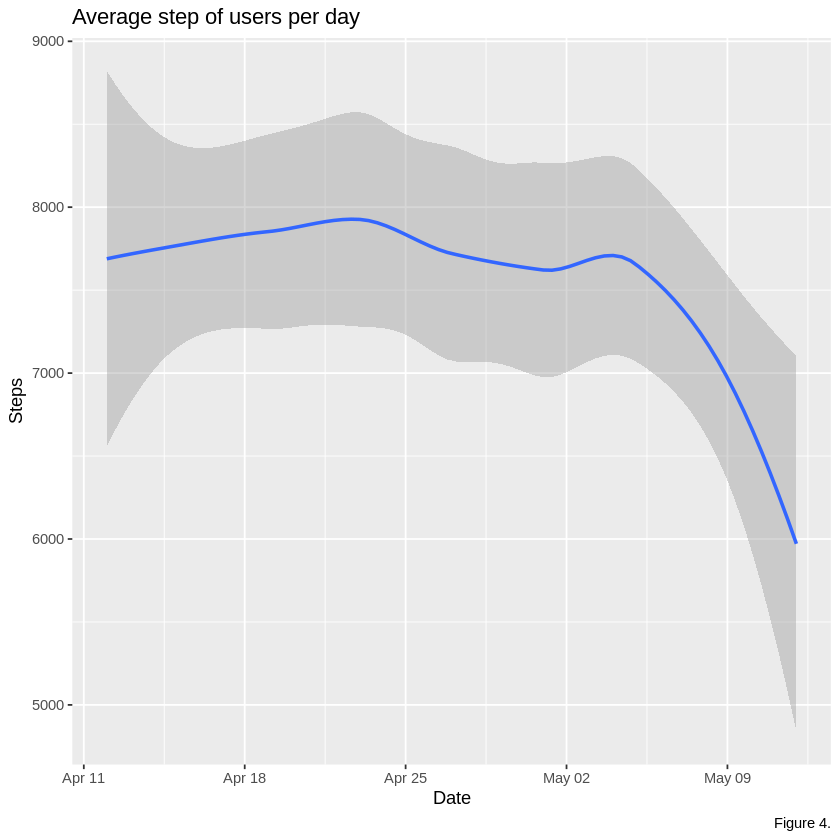

In [29]:
step_sleep_protect %>%
  group_by(ActivityDay) %>%
  summarise(Steps=mean(StepTotal)) %>%
  ggplot()+geom_smooth(aes(x=ActivityDay, y=Steps)) +
  labs(x="Date", y="Steps", title = "Average step of users per day", caption="Figure 4.")

### 5.3 Total Steps per day VS Calories burnt

In [30]:
Activity_all %>%
  summarise(correlation=cor(TotalSteps, Calories), conf.level = 0.95)

correlation,conf.level
<dbl>,<dbl>
0.5915681,0.95


Based on 95% confidence level, there is correlation between steps per day and calories with a correlation coefficient of 0.6. Let's visualize it.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


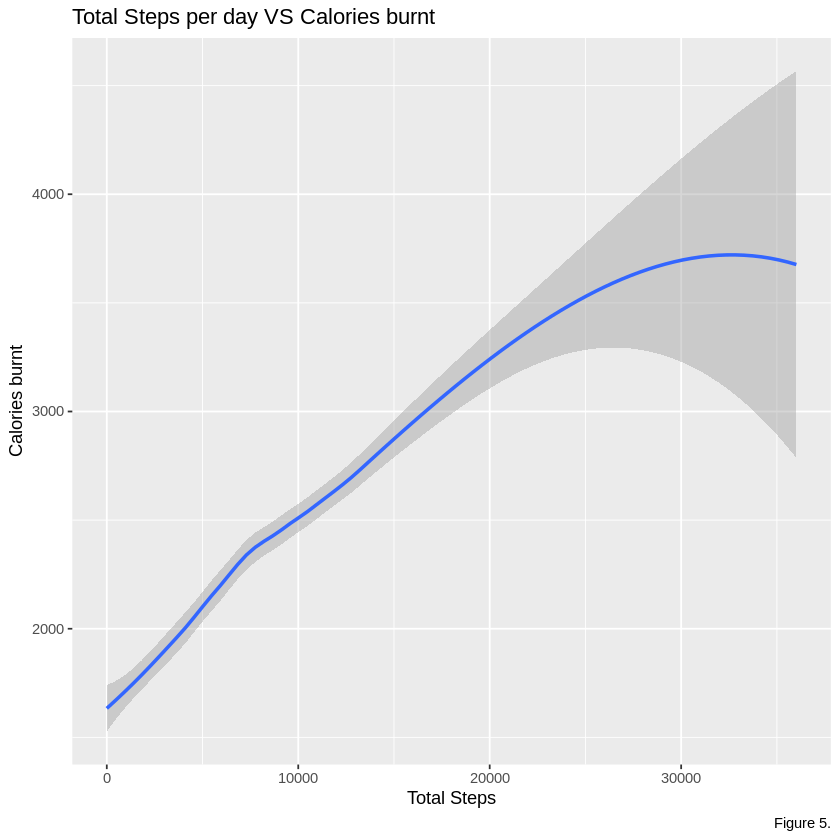

In [31]:
ggplot(Activity_all)+geom_smooth(aes(x=TotalSteps, y= Calories))+
  labs(x="Total Steps", y="Calories burnt", title = "Total Steps per day VS Calories burnt", caption="Figure 5.")

### 5.4 Steps during the day

In [32]:
hourlySteps <- hourlySteps %>%
  rename(date_time = ActivityHour) %>%
  mutate(date_time = as.POSIXct(date_time,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone())) %>%
  separate(date_time, into=c("ActivityDay", "times"), sep=' ')

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 934 rows [1, 25, 49, 73,
97, 121, 145, 169, 193, 217, 241, 265, 289, 313, 337, 361, 385, 409, 433, 457,
...].”


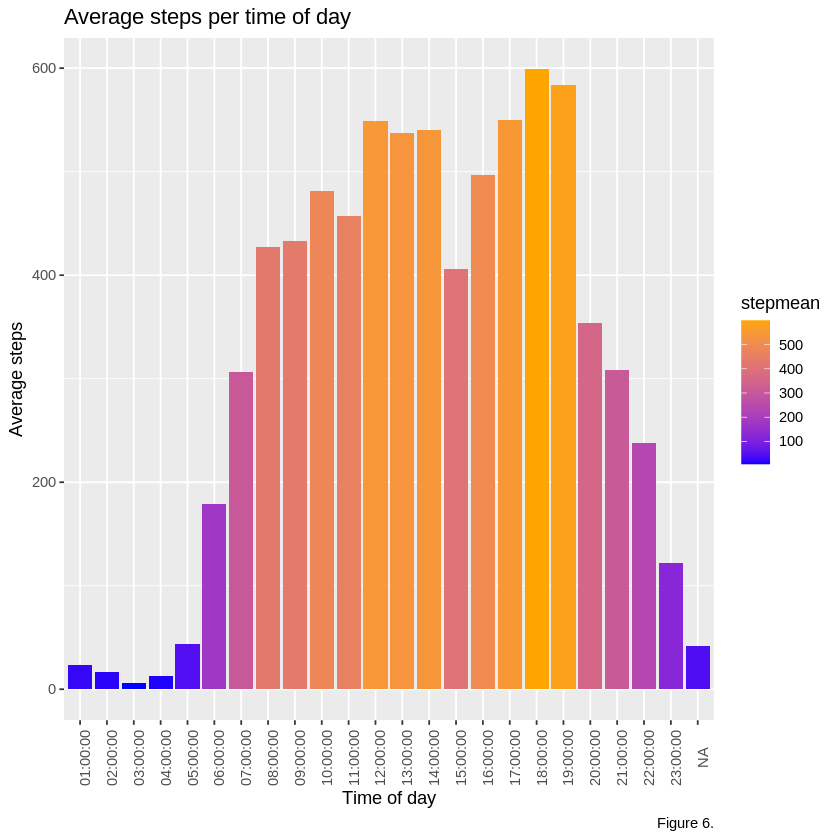

In [33]:
hourlySteps %>%
  group_by(times) %>%
  summarise(stepmean=mean(StepTotal)) %>%
  ggplot()+geom_col(aes(x=times, y=stepmean, fill=stepmean)) +
  scale_fill_gradient(low = "blue", high = "orange")+
  theme(axis.text.x = element_text(angle = 90))+
  labs(x="Time of day", y="Average steps", title = "Average steps per time of day", caption="Figure 6.")

According to figure 6, the highest average steps per day at the hour of 18.00.

### 5.5 Steps people should take per to be healthy

Based on the Centers for Disease Control and Prevention (CDC) in the US, adults should take 10000 steps per day to maintain a good general health. Taking less than 5000 steps per day is considered a sedentary lifestyle.

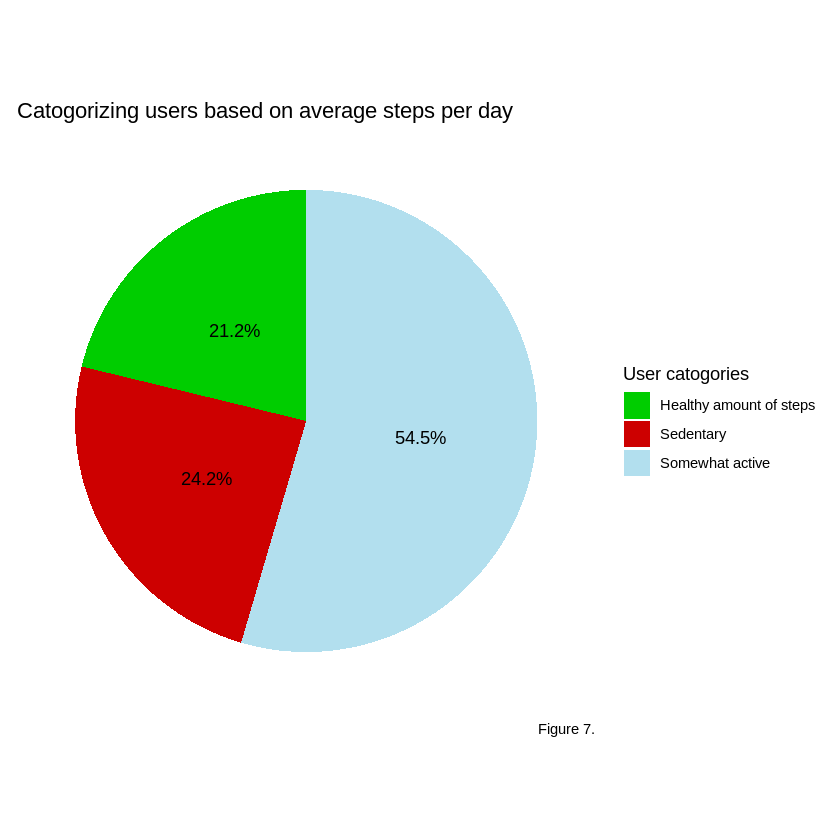

In [34]:
step_user <- step_sleep_protect %>%
  group_by(user) %>%
  summarise(meanstep=mean(StepTotal))

step_type <- step_user %>%
  mutate(step_type = case_when(
    meanstep < 5000 ~ "Sedentary",
    meanstep >= 5000 & meanstep < 10000 ~ "Somewhat active",
    meanstep >= 10000 ~ "Healthy amount of steps"
  ))

step_type_percent <- step_type %>%
  group_by(step_type) %>%
  summarise(each_type = n()) %>%
  mutate(all = sum(each_type)) %>%
  group_by(step_type) %>%
  summarise(step_percent = each_type / all )%>%
  mutate(step_percent_graph = scales::percent(step_percent))

step_type_percent %>%
  ggplot(aes(x="", y=step_percent, fill=step_type)) + geom_bar(stat = "identity")+
  coord_polar("y", start=0)+
  theme_minimal()+
  geom_text(aes(label = step_percent_graph),
            position = position_stack(vjust = 0.5))+
  scale_fill_manual(values = c("green3","red3", "lightblue2"))+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(),
        panel.grid = element_blank(),
        axis.ticks = element_blank(),
        axis.text.x = element_blank())+
  labs(fill = "User catogories", title="Catogorizing users based on average steps per day", caption="Figure 7.")

It shows 21.2% of users have a health amount of steps,  while 54.5% has between 5000 to 10000 steps per day, and 24.2% with less than 5000 steps per day.

### 5.6 Calories and intensities

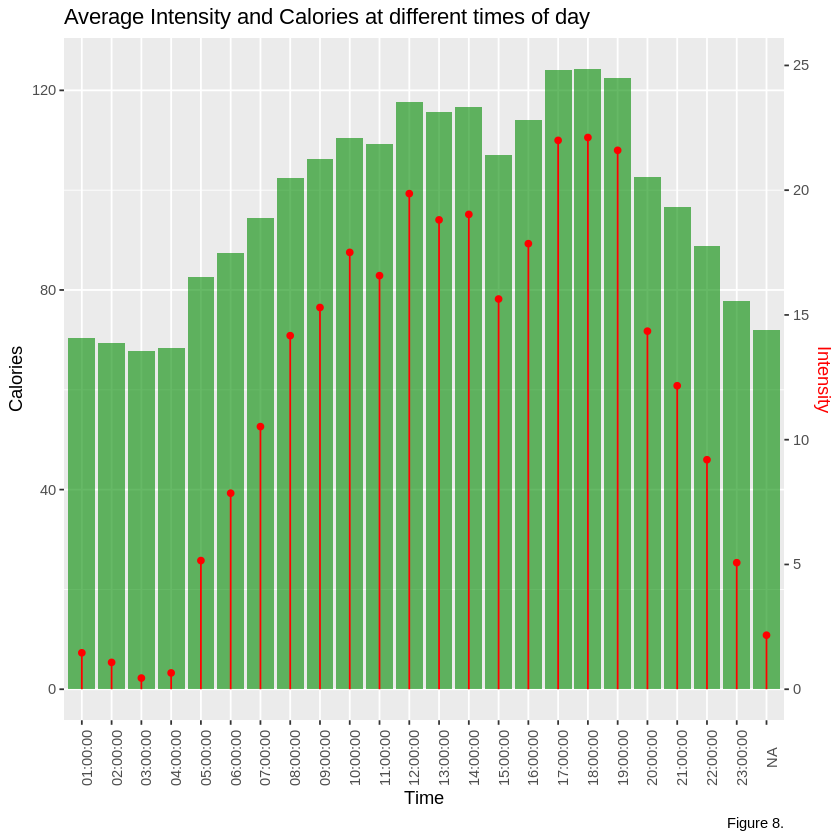

In [35]:
Calories_Intensities %>%
  group_by(times) %>%
  summarise(ti=mean(TotalIntensity), c=mean(Calories)) %>%
  ggplot()+
  geom_bar(aes(x=times, y=c), stat = "identity", fill = 'green4', alpha = 0.6)+
  geom_segment(aes(x = times, xend= times, y=0, yend = ti/0.2), stat = "identity", color = 'red',position = position_dodge(width = 0.5))+
  geom_point(aes(x=times, y=ti/0.2), color='red')+
  theme(axis.text.x = element_text(angle = 90))+
  scale_y_continuous(name = "Calories",
                     sec.axis = sec_axis(~.*0.2, name = "Intensity"))+
  theme(axis.title.y.right = element_text(color = "red"))+
  labs(x="Time", title= "Average Intensity and Calories at different times of day", caption="Figure 8.")

Based on the graph calories are connected to intensity, but at lower intensity levels, calorie burn drops significantly. The highest average intensity occurs at 18:00, while the lowest is at 03:00. The peak intensity aligns with the time most users finish work, whereas the lowest corresponds to sleeping hours. Additionally, users are generally active between 07:00 and 21:00, with a noticeable dip around 15:00, likely indicating a rest period after lunch.

## 6. Act phase

## 6.1 Summary & Insights
* **Tracking Gaps**: Figures 1 and 2 show that while some users track their daily steps and activity with Bellabeat products, they do not track their sleep. This may be because they don’t have a device designed for sleep tracking or find Bellabeat products uncomfortable to wear at night. To address this, Bellabeat could market sleep-compatible devices or develop a dedicated sleep tracker that monitors sleep patterns, including REM sleep.

* **Bedtime Screen Use**: Figure 3 highlights a gap between the time users spend in bed and when they actually fall asleep. This could be due to phone usage before sleep. To improve sleep quality, the Bellabeat app could send notifications reminding users to reduce screen time when they are detected in bed, enhancing user engagement.

* **Declining Activity Levels**: Figure 4 indicates that users are becoming less active over time, suggesting a decrease in product usage. To encourage more engagement, Bellabeat could introduce a reward system where users earn points for logging their activity, which can be redeemed for discounts on Bellabeat products.

* **Step Count Deficiency**: Figure 7 shows that over 70% of users are not meeting the recommended daily step count. To help users reach the 10,000-step goal, the Bellabeat app could send personalized notifications based on their average hourly steps, encouraging them to stay active throughout the day.

### 6.2 Conclusions & actionable recommendations
* **Gap in Sleep Tracking**: Many users track steps and activity but not sleep, possibly due to discomfort or lack of compatible devices. Bellabeat can develop and promote sleep-friendly products.

* **Phone Usage Before Sleep**: The gap between time in bed and actual sleep suggests phone usage. Bellabeat could send screen-time reduction reminders to improve sleep quality.

* **Decline in User Activity**: User engagement appears to be decreasing. A reward-based system (e.g., earning points for tracking activity) could encourage consistent usage.

* **Users Not Meeting Step Goals**: Over 70% of users do not reach the recommended daily step count. Personalized step reminders in the app could help encourage movement.

* **Enhancing User Experience**: By addressing these issues, Bellabeat can improve user engagement, promote healthier habits, and provide a more comprehensive health-tracking experience.